In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mplsoccer import Pitch
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Set up the football pitch
pitch_length = 100
pitch_width = 100

In [3]:
# Player IDs for the USA team
usa_player_ids = {
    'Alyssa Naeher': 796768,
    'Emily Fox': 1383163,
    'Naomi Girma': 1177871,
    'Tierna Davidson': 973855,
    'Crystal Dunn': 121101,
    'Lindsey Horan': 314812,
    'Samantha Coffey': 1177862,
    'Trinity Rodman': 1115744,
    'Rose Lavelle': 963170,
    'Sophia Smith': 945052,
    'Mallory Swanson': 845509,
    'Lynn Williams': 1004814,
    'Korbin Albert': 1473133,
    'Casey Short Krueger': 999985,
    'Jenna Nighswonger': 1481947,
    'Emily Sonnett': 963175
}

# Player IDs for the Zambia team
zam_player_ids = {
    'Ngambo Musole': 1131418,
    'Martha Tembo': 1130787,
    'Lushomo Mweemba': 1130435,
    'Pauline Zulu': 1426954,
    'Esther Siamfuko': 1130436,
    'Racheal Kundananji': 1130786,
    'Grace Chanda': 1130429,
    'Hellen Chanda': 1130438,
    'Prisca Chilufya': 1106004,
    'Barbra Banda': 1130427,
    'Kabange Mupopo': 1885510,
    'Avell Chitundu': 1130430,
    'Esther Muchinga': 1885509
}

In [4]:
# Function to fetch heatmap data
def fetch_heatmap_data(player_id):
    url = f'https://www.sofascore.com/api/v1/event/12178882/player/{player_id}/heatmap'
    response = requests.get(url)
    data = response.json()
    if 'heatmap' in data and isinstance(data['heatmap'], list):
        x_coords = [point['x'] for point in data['heatmap']]
        y_coords = [point['y'] for point in data['heatmap']]
        return x_coords, y_coords
    else:
        return [], []

In [5]:
# Function to plot a player's heatmap
def plot_heatmap(ax, x_coords, y_coords, title):
    ax.plot([0, 0, pitch_length, pitch_length, 0], [0, pitch_width, pitch_width, 0, 0], color="black")
    ax.plot([0, 6, 6, 0], [30, 30, 70, 70], color="black")
    ax.plot([100, 94, 94, 100], [30, 30, 70, 70], color="black")
    ax.plot([0, 18, 18, 0], [18, 18, 82, 82], color="black")
    ax.plot([100, 82, 82, 100], [18, 18, 82, 82], color="black")
    ax.plot([50, 50], [0, 100], color="black")
    ax.plot([50], [50], marker='o', color='black')
    circle = plt.Circle((50, 50), 9.15, color="black", fill=False)
    ax.add_patch(circle)
    sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
    ax.set_xlim(0, pitch_length)
    ax.set_ylim(0, pitch_width)
    ax.set_title(title)
    ax.set_aspect('equal', adjustable='box')

C:\Users\theod\AppData\Local\Temp\ipykernel_25008\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_25008\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_25008\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_25008\3158559870.py:12: FutureWarning: 



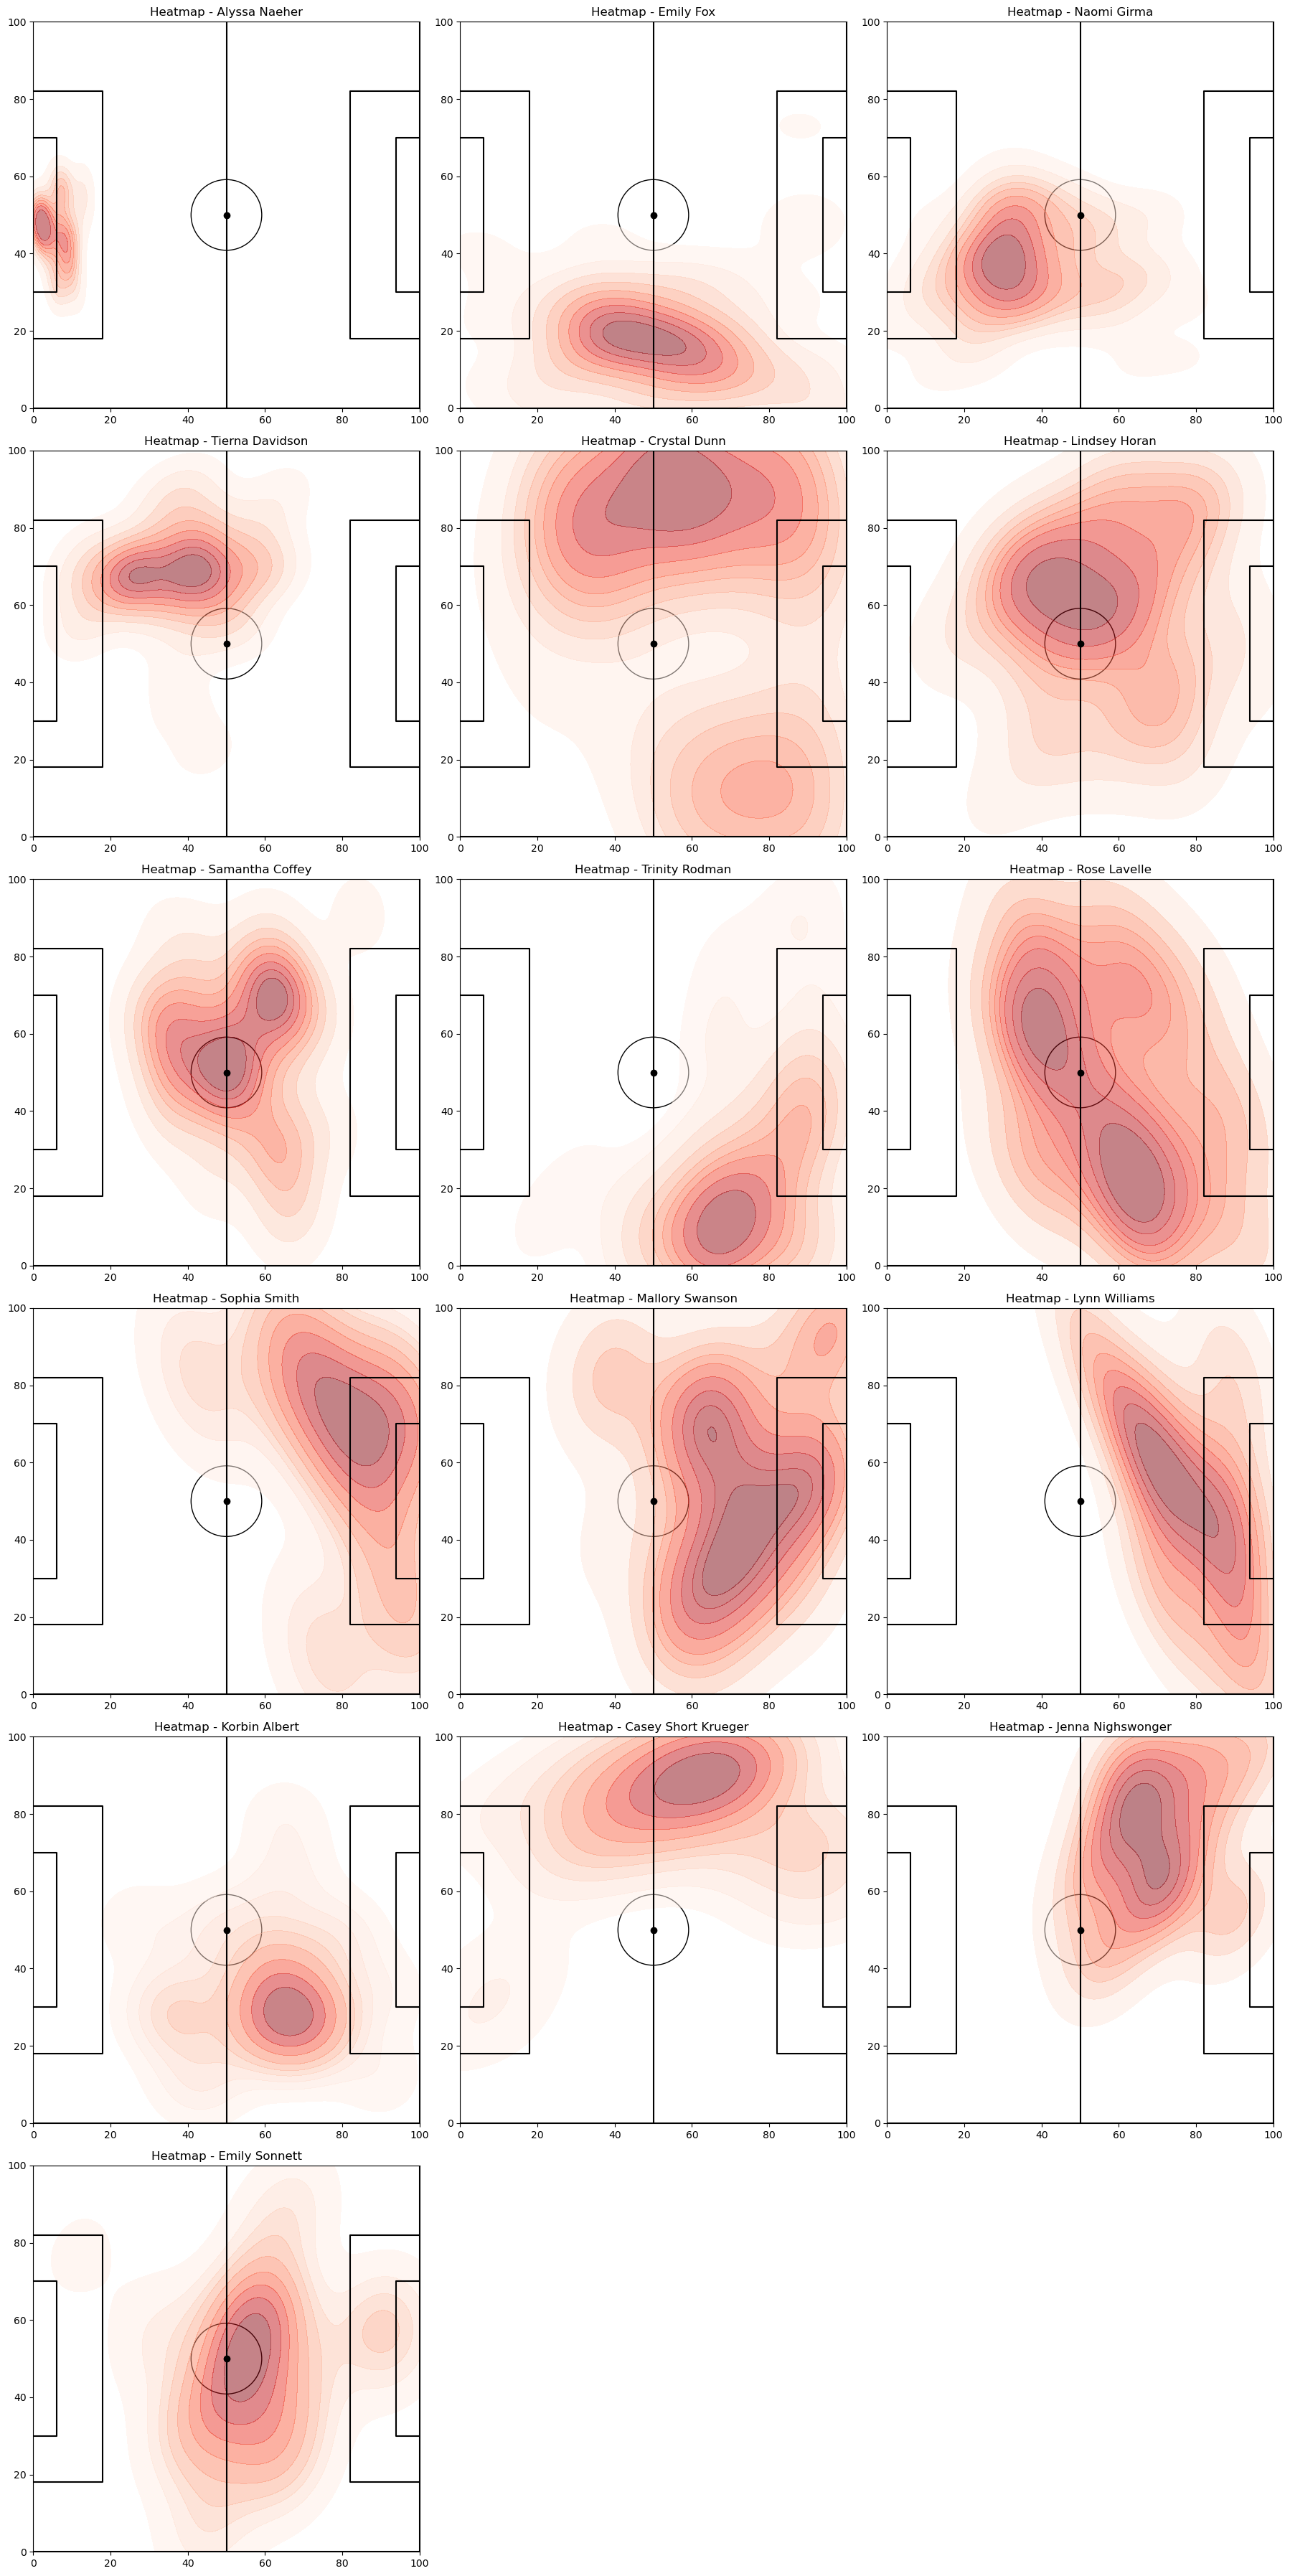

In [6]:
# Create subplots for individual heatmaps
fig, axes = plt.subplots(6, 3, figsize=(18, 36))

# Collect all coordinates for combined heatmap
all_x_coords = []
all_y_coords = []

# Plot each player's heatmap
for ax, (player_name, player_id) in zip(axes.flat, usa_player_ids.items()):
    x_coords, y_coords = fetch_heatmap_data(player_id)
    plot_heatmap(ax, x_coords, y_coords, f"Heatmap - {player_name}")
    all_x_coords.extend(x_coords)
    all_y_coords.extend(y_coords)

# Remove any extra subplots (if any)
for i in range(len(usa_player_ids), len(axes.flat)):
    fig.delaxes(axes.flat[i])

plt.tight_layout()
plt.show()

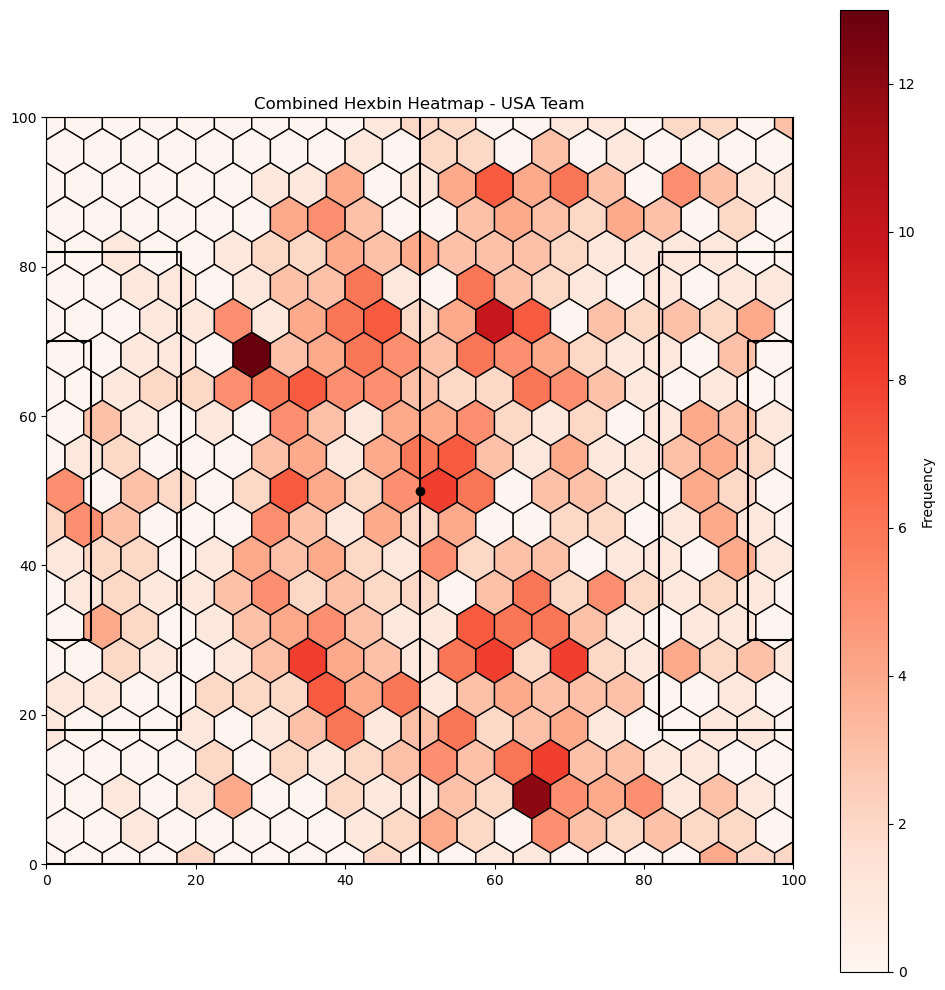

In [7]:
# Create a combined heatmap with hexbin
fig, ax = plt.subplots(figsize=(10, 10))

# Function to plot a combined heatmap with hexbin
def plot_combined_hexbin(ax, x_coords, y_coords):
    ax.plot([0, 0, pitch_length, pitch_length, 0], [0, pitch_width, pitch_width, 0, 0], color="black")
    ax.plot([0, 6, 6, 0], [30, 30, 70, 70], color="black")
    ax.plot([100, 94, 94, 100], [30, 30, 70, 70], color="black")
    ax.plot([0, 18, 18, 0], [18, 18, 82, 82], color="black")
    ax.plot([100, 82, 82, 100], [18, 18, 82, 82], color="black")
    ax.plot([50, 50], [0, 100], color="black")
    ax.plot([50], [50], marker='o', color='black')
    circle = plt.Circle((50, 50), 9.15, color="black", fill=False)
    ax.add_patch(circle)
    hb = ax.hexbin(x_coords, y_coords, gridsize=20, cmap='Reds', edgecolors='black')
    cb = plt.colorbar(hb, ax=ax)
    cb.set_label('Frequency')
    ax.set_xlim(0, pitch_length)
    ax.set_ylim(0, pitch_width)
    ax.set_title("Combined Hexbin Heatmap - USA Team")
    ax.set_aspect('equal', adjustable='box')

plot_combined_hexbin(ax, all_x_coords, all_y_coords)

plt.tight_layout()
plt.show()

C:\Users\theod\AppData\Local\Temp\ipykernel_25008\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_25008\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_25008\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_25008\3158559870.py:12: FutureWarning: 



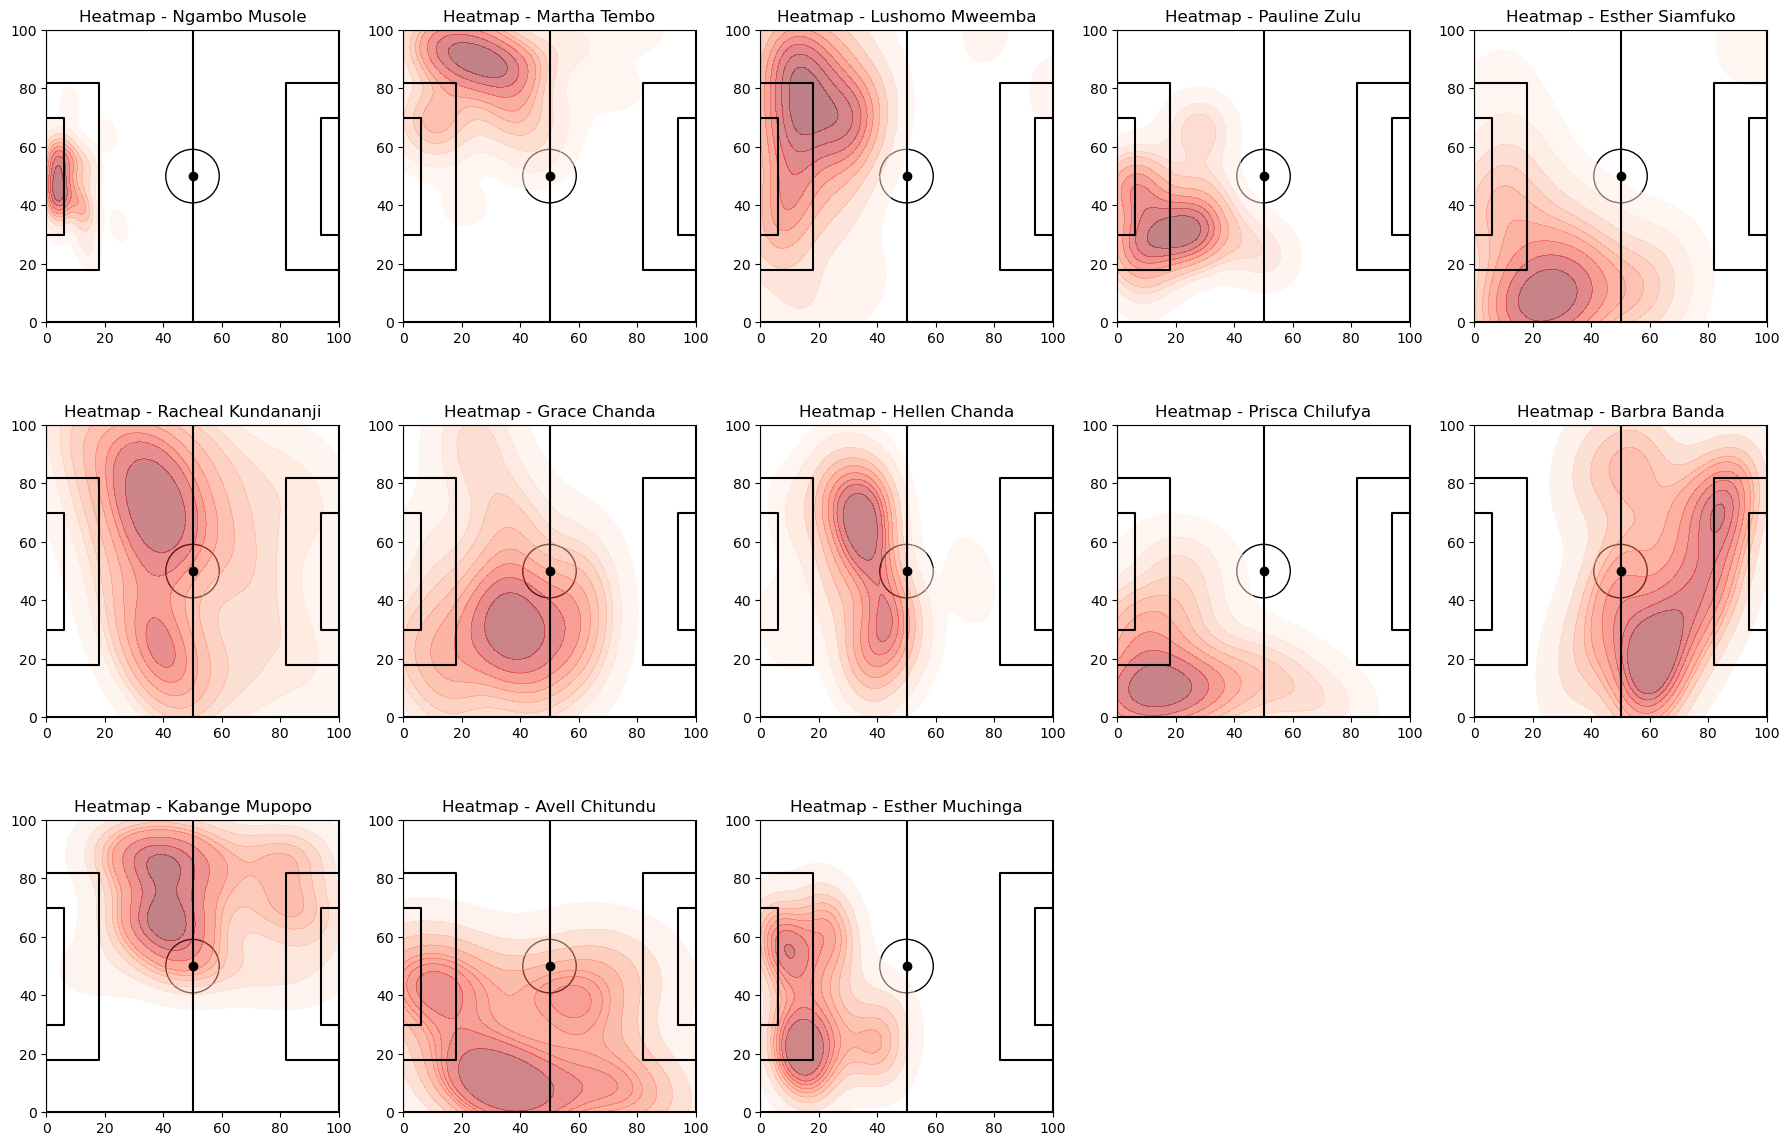

In [8]:
# Create subplots for individual heatmaps
fig, axes = plt.subplots(3, 5, figsize=(18, 12))

# Collect all coordinates for combined heatmap
all_x_coords = []
all_y_coords = []

# Plot each player's heatmap
for ax, (player_name, player_id) in zip(axes.flat, zam_player_ids.items()):
    x_coords, y_coords = fetch_heatmap_data(player_id)
    plot_heatmap(ax, x_coords, y_coords, f"Heatmap - {player_name}")
    all_x_coords.extend(x_coords)
    all_y_coords.extend(y_coords)

# Hide any extra subplots (not needed in this case since we have exactly 13 players)
if len(zam_player_ids) < len(axes.flat):
    for ax in axes.flat[len(zam_player_ids):]:
        ax.set_visible(False)

plt.tight_layout()
plt.show()


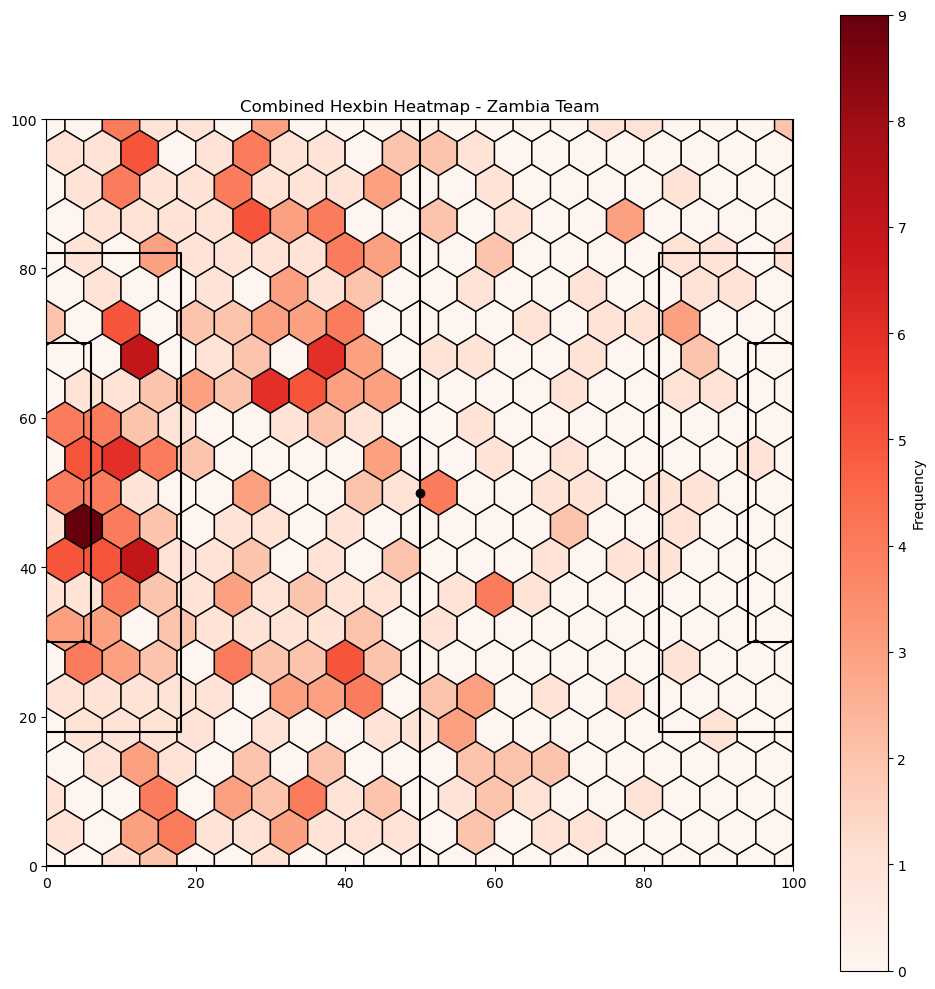

In [9]:
# Create a combined heatmap with hexbin
fig, ax = plt.subplots(figsize=(10, 10))

# Function to plot a combined heatmap with hexbin
def plot_combined_hexbin(ax, x_coords, y_coords):
    ax.plot([0, 0, pitch_length, pitch_length, 0], [0, pitch_width, pitch_width, 0, 0], color="black")
    ax.plot([0, 6, 6, 0], [30, 30, 70, 70], color="black")
    ax.plot([100, 94, 94, 100], [30, 30, 70, 70], color="black")
    ax.plot([0, 18, 18, 0], [18, 18, 82, 82], color="black")
    ax.plot([100, 82, 82, 100], [18, 18, 82, 82], color="black")
    ax.plot([50, 50], [0, 100], color="black")
    ax.plot([50], [50], marker='o', color='black')
    circle = plt.Circle((50, 50), 9.15, color="black", fill=False)
    ax.add_patch(circle)
    hb = ax.hexbin(x_coords, y_coords, gridsize=20, cmap='Reds', edgecolors='black')
    cb = plt.colorbar(hb, ax=ax)
    cb.set_label('Frequency')
    ax.set_xlim(0, pitch_length)
    ax.set_ylim(0, pitch_width)
    ax.set_title("Combined Hexbin Heatmap - Zambia Team")
    ax.set_aspect('equal', adjustable='box')

plot_combined_hexbin(ax, all_x_coords, all_y_coords)

plt.tight_layout()
plt.show()

In [10]:
# Function to fetch player statistics
def fetch_player_statistics(player_id):
    url = f'https://api.sofascore.com/api/v1/event/12178882/player/{player_id}/statistics'
    response = requests.get(url)
    data = response.json()
    return data['statistics']

In [11]:
# Combine player IDs
all_player_ids = {**usa_player_ids, **zam_player_ids}

# Fetch and compile statistics for all players
data = []
for player_name, player_id in all_player_ids.items():
    try:
        stats = fetch_player_statistics(player_id)
        stats['Player'] = player_name
        stats['Player_ID'] = player_id
        data.append(stats)
    except KeyError:
        print(f"Statistics not available for player: {player_name}")

# Convert to DataFrame
df = pd.DataFrame(data)

# Reorder columns to place 'Player' and 'Player_ID' first
cols = ['Player', 'Player_ID'] + [col for col in df.columns if col not in ['Player', 'Player_ID']]
df = df[cols]

# Save to Excel
output_path = 'C:/Users/theod/Desktop/SPORTS ANALYTICS/olumpic games/player_stats_usa_zam_round1.xlsx'
df.to_excel(output_path, index=False)

print(f"Data successfully saved to {output_path}")


Data successfully saved to C:/Users/theod/Desktop/SPORTS ANALYTICS/olumpic games/player_stats_usa_zam_round1.xlsx


In [12]:
# URL to fetch match statistics
url = 'https://www.sofascore.com/api/v1/event/12178882/statistics'

# Fetch the data
response = requests.get(url)
data = response.json()

# Process the data to map home to USA and away to Zambia
team_data = []

for team in data['statistics']:
    for group in team.get('groups', []):
        group_name = group.get('groupName', 'General')
        for stat in group.get('statisticsItems', []):
            team_data.append({
                'Team': 'USA',
                'Group': group_name,
                'Category': stat.get('name', 'Unknown'),
                'Value': stat.get('homeValue', 0)
            })
            team_data.append({
                'Team': 'Zambia',
                'Group': group_name,
                'Category': stat.get('name', 'Unknown'),
                'Value': stat.get('awayValue', 0)
            })

# Convert the processed data into a DataFrame
df = pd.DataFrame(team_data)

# Pivot the DataFrame for comparison
comparison_df = df.pivot_table(index=['Group', 'Category'], columns='Team', values='Value', aggfunc='first').reset_index()

# Save the comparison DataFrame to Excel
comparison_df.to_excel('C:/Users/theod/Desktop/SPORTS ANALYTICS/olumpic games/player_stats_ger_aus_round1.xlsx', index=False)

# Print the comparison DataFrame to inspect it
print(comparison_df)

Team           Group                 Category  USA  Zambia
0             Attack       Big chances missed    6       0
1             Attack       Big chances scored    3       0
2             Attack    Fouled in final third    4       1
3             Attack                 Offsides    3       1
4             Attack            Through balls    3       0
5             Attack  Touches in penalty area   58      11
6          Defending               Clearances    8      31
7          Defending            Interceptions    4      14
8          Defending               Recoveries   63      52
9          Defending              Tackles won   13      11
10         Defending            Total tackles   14      15
11             Duels             Aerial duels   11       6
12             Duels             Dispossessed    9       7
13             Duels                 Dribbles   16       4
14             Duels                    Duels   62      38
15             Duels             Ground duels   37      

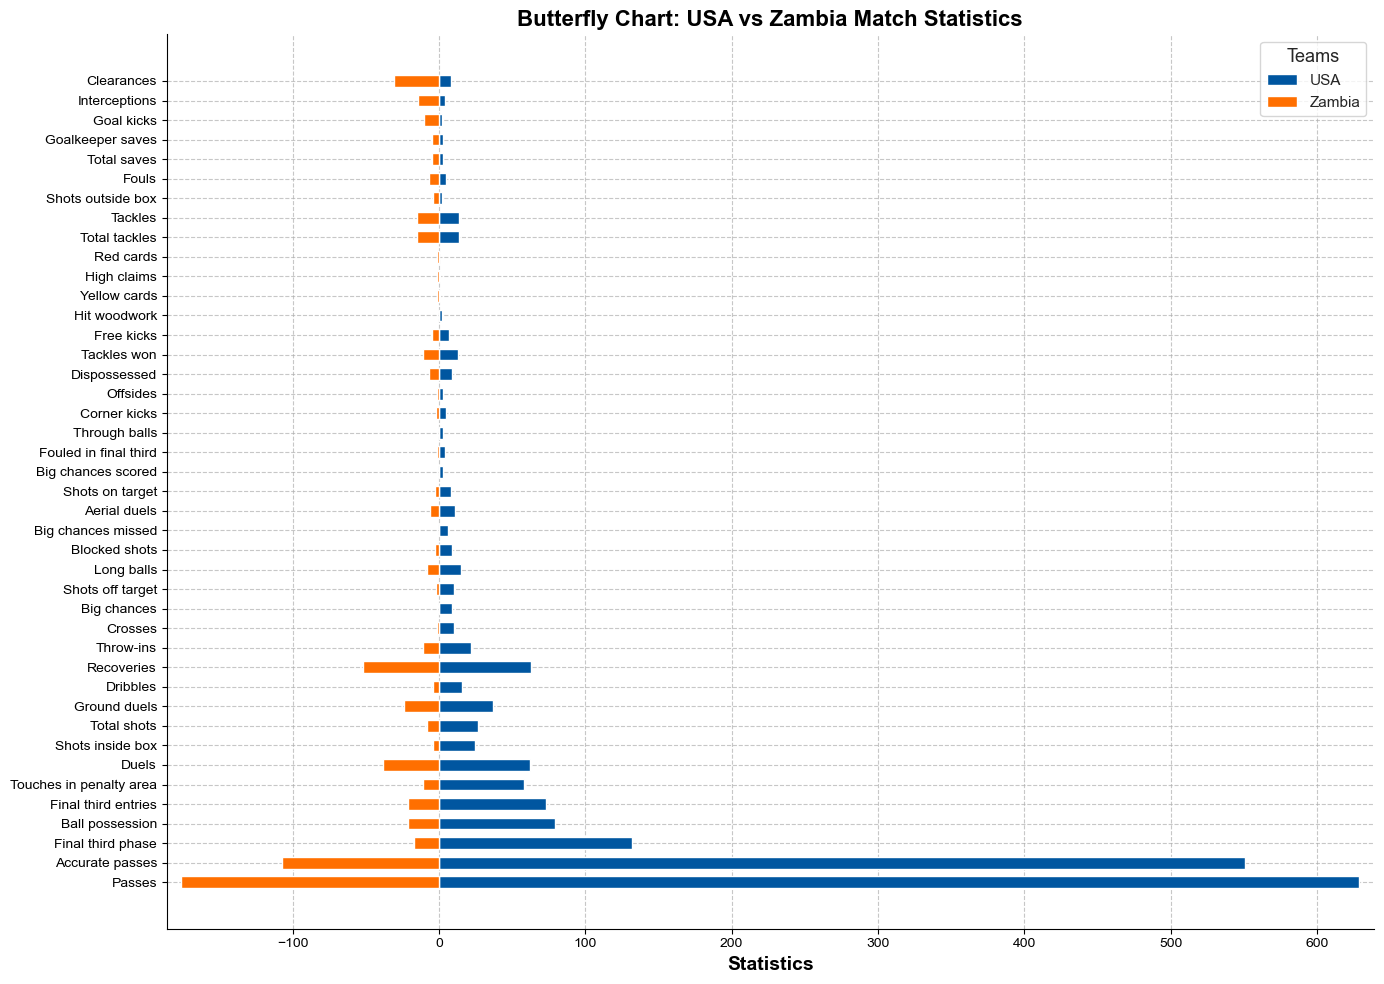

In [13]:
# Load the data from the Excel file
file_path = 'C:/Users/theod/Desktop/SPORTS ANALYTICS/olumpic games/player_stats_ger_aus_round1.xlsx'
df = pd.read_excel(file_path)

# Prepare the data for the butterfly chart
df['Difference'] = df['USA'] - df['Zambia']
df = df.sort_values('Difference', ascending=False)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 10))

# Use Seaborn style for a modern look
sns.set(style='whitegrid')

# Define professional colors
color_usa = '#0056A0'  # Dark Blue
color_zambia = '#FF6F00'  # Orange

# Plot USA statistics
ax.barh(df['Category'], df['USA'], color=color_usa, edgecolor='w', label='USA', height=0.6, zorder=3)

# Plot Zambia statistics (negative values for left side)
ax.barh(df['Category'], -df['Zambia'], color=color_zambia, edgecolor='w', label='Zambia', height=0.6, zorder=3)

# Add vertical grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.7, which='both', zorder=0)

# Adding labels and title with modern font styles
ax.set_xlabel('Statistics', fontsize=14, fontweight='bold')
ax.set_title('Butterfly Chart: USA vs Zambia Match Statistics', fontsize=16, fontweight='bold')
ax.legend(title='Teams', title_fontsize='13', fontsize='11')

# Adjust x-axis limits for better visual separation
ax.set_xlim([-df['Zambia'].max() - 10, df['USA'].max() + 10])

# Remove the spines for a cleaner look
sns.despine()

# Display the plot with tight layout
plt.tight_layout()
plt.show()


In [14]:
# Function to fetch player statistics by ID
def fetch_player_statistics(player_id):
    url = f'https://api.sofascore.com/api/v1/event/12178882/player/{player_id}/statistics'
    response = requests.get(url)
    data = response.json()
    return data['statistics'].get('rating', 'N/A')

In [15]:
# Collect player statistics
player_stats = []

# Process statistics for Australian players
for player, player_id in usa_player_ids.items():
    rating = fetch_player_statistics(player_id)
    player_stats.append({
        'Player': player,
        'Team': 'USA',
        'Rating': rating
    })

# Process statistics for German players
for player, player_id in zam_player_ids.items():
    rating = fetch_player_statistics(player_id)
    player_stats.append({
        'Player': player,
        'Team': 'Zambia',
        'Rating': rating
    })


In [16]:
# Convert to DataFrame
df = pd.DataFrame(player_stats)

# Sort the DataFrame by rating
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.sort_values(by='Rating', ascending=False)


C:\Users\theod\AppData\Local\Temp\ipykernel_25008\897099558.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df.pivot('Player', 'Team', 'Rating')


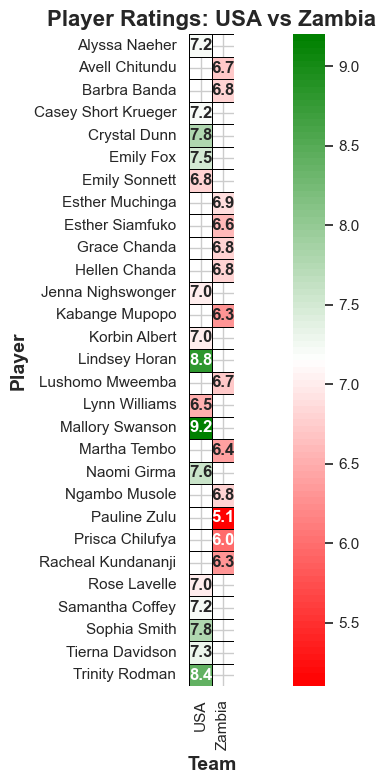

In [17]:
# Prepare data for heatmap
pivot_table = df.pivot('Player', 'Team', 'Rating')

# Define a custom color map: green for high values, red for low values
colors = ["red", "white", "green"]  # Low to High
n_bins = 100  # Number of bins
cmap_name = 'red_white_green'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap=cm, cbar=True,
                 linewidths=0.5, linecolor='black', square=True, 
                 annot_kws={"size": 12, 'weight': 'bold'})

# Customizing the plot
ax.set_title('Player Ratings: USA vs Zambia', fontsize=16, fontweight='bold')
ax.set_xlabel('Team', fontsize=14, fontweight='bold')
ax.set_ylabel('Player', fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

In [20]:
# Fetch shot data

# Fetch shot data
url = 'https://www.sofascore.com/api/v1/event/12178882/shotmap'
response = requests.get(url)
data = response.json()

print(data)

{'shotmap': [{'player': {'name': 'Korbin Albert', 'firstName': '', 'lastName': '', 'slug': 'korbin-albert', 'shortName': 'K. Albert', 'position': 'M', 'jerseyNumber': '24', 'userCount': 294, 'id': 1473133}, 'isHome': True, 'shotType': 'save', 'situation': 'assisted', 'playerCoordinates': {'x': 19.2, 'y': 51, 'z': 0}, 'bodyPart': 'left-foot', 'goalMouthLocation': 'high-centre', 'goalMouthCoordinates': {'x': 0, 'y': 49.9, 'z': 20.9}, 'blockCoordinates': {'x': 1.4, 'y': 49.8, 'z': 0}, 'id': 3485080, 'time': 90, 'addedTime': 4, 'timeSeconds': 5610, 'draw': {'start': {'x': 51, 'y': 19.2}, 'block': {'x': 49.8, 'y': 1.4}, 'end': {'x': 50.1, 'y': 0}, 'goal': {'x': 50.1, 'y': 79.1}}, 'reversedPeriodTime': 1, 'reversedPeriodTimeSeconds': 690, 'incidentType': 'shot'}, {'player': {'name': 'Racheal Kundananji', 'slug': 'kundananji-racheal', 'shortName': 'R. Kundananji', 'position': 'F', 'jerseyNumber': '9', 'userCount': 1652, 'id': 1130786}, 'isHome': False, 'shotType': 'block', 'situation': 'assis

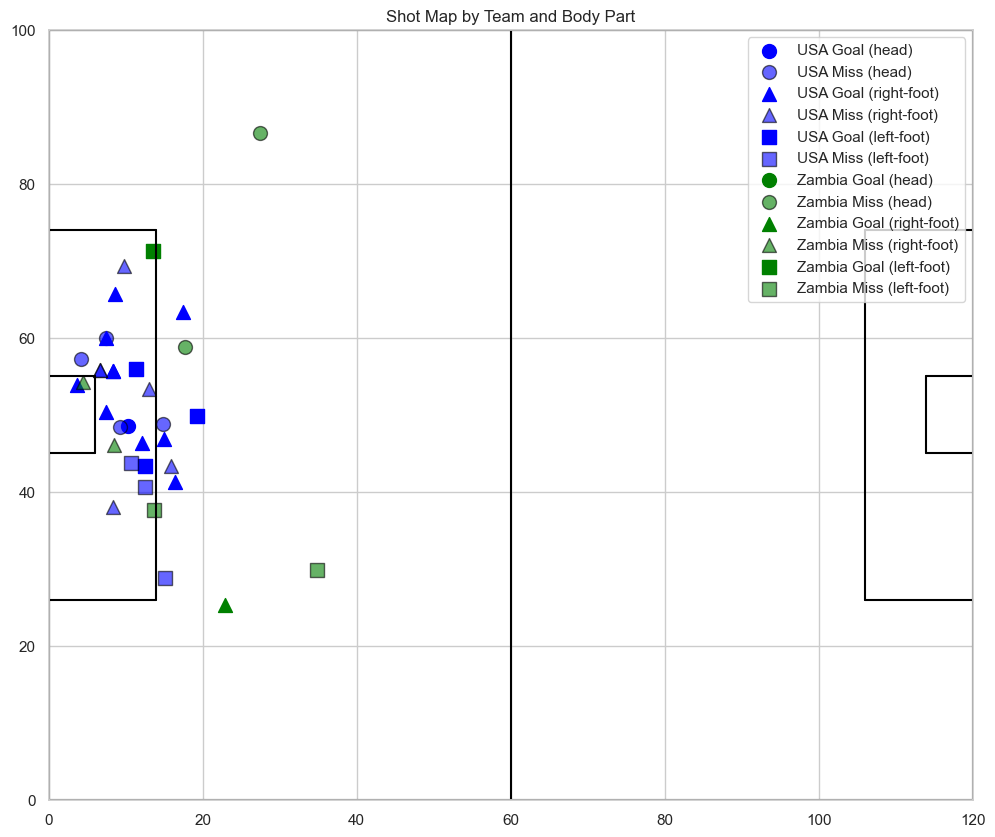

In [28]:
# Data
data = {
    'Player Name': ['Korbin Albert', 'Racheal Kundananji', 'Crystal Dunn', 'Barbra Banda', 'Racheal Kundananji', 
                    'Casey Short Krueger', 'Emily Fox', 'Jenna Nighswonger', 'Emily Fox', 'Casey Short Krueger',
                    'Barbra Banda', 'Mallory Swanson', 'Trinity Rodman', 'Korbin Albert', 'Trinity Rodman',
                    'Lynn Williams', 'Barbra Banda', 'Barbra Banda', 'Racheal Kundananji', 'Trinity Rodman',
                    'Kabange Mupopo', 'Trinity Rodman', 'Mallory Swanson', 'Mallory Swanson', 'Sophia Smith',
                    'Rose Lavelle', 'Trinity Rodman', 'Lindsey Horan', 'Trinity Rodman', 'Lindsey Horan',
                    'Mallory Swanson', 'Lindsey Horan', 'Crystal Dunn', 'Trinity Rodman', 'Sophia Smith'],
    'Shot Type': ['save', 'block', 'miss', 'miss', 'save', 
                  'block', 'miss', 'block', 'block', 'block',
                  'save', 'miss', 'goal', 'save', 'block',
                  'block', 'miss', 'miss', 'save', 'goal',
                  'block', 'goal', 'post', 'block', 'save',
                  'save', 'block', 'miss', 'save', 'block',
                  'post', 'block', 'save', 'miss', 'save'],
    'Situation': ['assisted', 'assisted', 'assisted', 'assisted', 'fast-break',
                  'assisted', 'set-piece', 'regular', 'regular', 'assisted',
                  'assisted', 'regular', 'regular', 'fast-break', 'regular',
                  'fast-break', 'set-piece', 'regular', 'fast-break', 'regular',
                  'assisted', 'assisted', 'regular', 'fast-break', 'regular',
                  'regular', 'assisted', 'corner', 'corner', 'block',
                  'post', 'corner', 'post', 'regular', 'regular'],
    'Body Part': ['left-foot', 'left-foot', 'head', 'head', 'left-foot',
                  'right-foot', 'head', 'right-foot', 'left-foot', 'left-foot',
                  'right-foot', 'left-foot', 'right-foot', 'right-foot', 'right-foot',
                  'right-foot', 'left-foot', 'head', 'right-foot', 'right-foot',
                  'right-foot', 'right-foot', 'right-foot', 'left-foot', 'left-foot',
                  'right-foot', 'head', 'head', 'right-foot', 'right-foot',
                  'right-foot', 'right-foot', 'head', 'right-foot', 'right-foot'],
    'Goal Mouth Location': ['high-centre', 'low-left', 'close-right', 'high-right', 'high-centre',
                            'low-centre', 'left', 'low-centre', 'low-left', 'low-centre',
                            'high-left', 'low-centre', 'low-left', 'low-right', 'high',
                            'low-centre', 'close-right', 'close-left', 'high-left', 'high-right',
                            'high-left', 'high-right', 'high-left', 'low-left', 'close-right',
                            'high-right', 'low-centre', 'high-left', 'low-right', 'low-centre',
                            'high', 'low-centre', 'high-left', 'high', 'low-right'],
    'X Coordinate': [19.2, 13.7, 4.2, 17.7, 13.6, 
                     8.3, 9.2, 12.1, 11.4, 15.1,
                     22.9, 12.5, 17.4, 8.6, 13,
                     15, 34.8, 27.4, 8.5, 7.4,
                     4.5, 7.5, 15.9, 10.7, 12.5,
                     3.7, 14.8, 10.3, 9.8, 16.4,
                     6.7, 8.3, 7.4, 6.7, 8.3],
    'Y Coordinate': [49.8, 37.7, 57.2, 58.8, 71.3,
                     38, 48.4, 46.4, 56, 28.8,
                     25.3, 43.3, 63.4, 65.7, 53.4,
                     46.9, 29.9, 86.6, 46.1, 50.3,
                     54.2, 60, 43.3, 43.7, 40.6,
                     53.9, 48.8, 48.5, 69.3, 41.3,
                     55.8, 55.7, 60, 55.8, 55.7],
    'Goal (1) / Miss (0)': [1, 0, 0, 0, 1,
                             0, 0, 1, 1, 0,
                             1, 1, 1, 1, 0,
                             1, 0, 0, 0, 1,
                             0, 1, 0, 0, 0,
                             1, 0, 1, 0, 1,
                             0, 1, 0, 0, 1]
}

df = pd.DataFrame(data)

# Mapping player names to teams
team_mapping = {
    **{name: 'USA' for name in usa_player_ids},
    **{name: 'Zambia' for name in zam_player_ids}
}

# Adding team information to the DataFrame
df['Team'] = df['Player Name'].map(team_mapping)

# Define team colors
team_colors = {
    'USA': 'blue',
    'Zambia': 'green'
}

# Assign markers for body parts
body_part_markers = {
    'head': 'o',          # Circle
    'right-foot': '^',    # Triangle up
    'left-foot': 's'      # Square
}

# Plotting the shot map
fig, ax = plt.subplots(figsize=(12, 10))

# Setting up the dimensions of the field
field_dimen = (100, 120)
ax.set_xlim(0, field_dimen[1])
ax.set_ylim(0, field_dimen[0])

# Drawing the field
# Pitch Outline & Centre Line
plt.plot([0, 0], [0, 100], color="black")
plt.plot([0, 120], [100, 100], color="black")
plt.plot([120, 120], [100, 0], color="black")
plt.plot([120, 0], [0, 0], color="black")
plt.plot([60, 60], [0, 100], color="black")

# Left Penalty Area
plt.plot([14, 14], [74, 26], color="black")
plt.plot([0, 14], [74, 74], color="black")
plt.plot([0, 14], [26, 26], color="black")

# Right Penalty Area
plt.plot([120, 106], [74, 74], color="black")
plt.plot([106, 106], [74, 26], color="black")
plt.plot([120, 106], [26, 26], color="black")

# Left 6-yard Box
plt.plot([0, 6], [55, 55], color="black")
plt.plot([6, 6], [55, 45], color="black")
plt.plot([6, 0], [45, 45], color="black")

# Right 6-yard Box
plt.plot([120, 114], [55, 55], color="black")
plt.plot([114, 114], [55, 45], color="black")
plt.plot([114, 120], [45, 45], color="black")


# Plot the shots
for team in df['Team'].unique():
    team_data = df[df['Team'] == team]
    for body_part, marker in body_part_markers.items():
        body_part_data = team_data[team_data['Body Part'] == body_part]
        goals = body_part_data[body_part_data['Goal (1) / Miss (0)'] == 1]
        misses = body_part_data[body_part_data['Goal (1) / Miss (0)'] == 0]
        
        ax.scatter(goals['X Coordinate'], goals['Y Coordinate'], color=team_colors[team], marker=marker, label=f'{team} Goal ({body_part})', s=100)
        ax.scatter(misses['X Coordinate'], misses['Y Coordinate'], color=team_colors[team], marker=marker, label=f'{team} Miss ({body_part})', s=100, alpha=0.6, edgecolor='black')

# Adding legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

# Title
plt.title('Shot Map by Team and Body Part')

# Display
plt.gca().set_aspect('equal', adjustable='box')
plt.show()